### This pipe follows the following pipeline
- split text in train/test/valid sets
- preprocess each set into spacy format
- update labels on test/valid sets to match train sets
- train spacy format
- evaluate model on unseen test set
- make predictions

### Split dataset into train/test/valid sets

In [5]:
from _1_split_dataset import split_dataset
train_X, train_y, test_X, test_y, valid_X, valid_y = split_dataset('../consumer_complaints.csv',
                                                                  n_rows=1000)


Reading data..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):



Selected 1000 rows of dataset

Splitting dataset in train and test sets..

Shape of train_X: (722,)
Shape of train_y: (722,)

Shape of test_X: (150,)
Shape of test_y: (150,)

Shape of valid_X: (128,)
Shape of valid_y: (128,)

Text split complete for preprocessing


### Preprocess data series into spacy format

In [6]:
# Preprocess train data
from _2_preprocess_series import preprocess_series
train_label_values, train_data, train_texts, train_labels = preprocess_series(train_X, train_y)


Cleaning text..

Text cleaning complete

Number of labels: 11
['Credit reporting', 'Debt collection', 'Credit card', 'Student loan', 'Consumer Loan', 'Mortgage', 'Bank account or service', 'Prepaid card', 'Money transfers', 'Other financial service', 'Payday loan']

Converting data to spacy format

Data is now ready to be trained


In [7]:
# preprocess test set
test_label_values, test_data, test_texts, test_labels = preprocess_series(test_X, test_y)


Cleaning text..

Text cleaning complete

Number of labels: 10
['Credit card', 'Debt collection', 'Bank account or service', 'Mortgage', 'Prepaid card', 'Credit reporting', 'Consumer Loan', 'Student loan', 'Payday loan', 'Money transfers']

Converting data to spacy format

Data is now ready to be trained


In [8]:
# preprocess valid set
valid_label_values, valid_data, valid_texts, valid_labels = preprocess_series(valid_X, valid_y)


Cleaning text..

Text cleaning complete

Number of labels: 10
['Credit reporting', 'Credit card', 'Debt collection', 'Mortgage', 'Prepaid card', 'Student loan', 'Bank account or service', 'Consumer Loan', 'Money transfers', 'Payday loan']

Converting data to spacy format

Data is now ready to be trained


### Update labels

In [9]:
# update labels on test set to match train set
from _4_update_labels import update_labels
test_label_values, test_data, test_texts, test_labels = update_labels(train_label_values, valid_label_values, valid_data)

Label values have been updated

Number of labels: 11
['Bank account or service', 'Consumer Loan', 'Credit card', 'Credit reporting', 'Debt collection', 'Money transfers', 'Mortgage', 'Payday loan', 'Prepaid card', 'Student loan', 'Other financial service']


In [10]:
# update labels on valid set to match train set
valid_label_values, valid_data, valid_texts, valid_labels = update_labels(train_label_values, valid_label_values, valid_data)

Label values have been updated

Number of labels: 11
['Bank account or service', 'Consumer Loan', 'Credit card', 'Credit reporting', 'Debt collection', 'Money transfers', 'Mortgage', 'Payday loan', 'Prepaid card', 'Student loan', 'Other financial service']


### Train

In [13]:
# train spacy model
from _5_train_spacy import train_spacy
train_spacy(train_label_values, 
            train_data, 
            valid_texts, 
            valid_labels, 
            10, 
            'ensemble', 
            0.3,
            3e-3,
            'test_model_02')


Model loading complete

Training the model..

Iteration: 1
                         precision    recall  f1-score   support

Bank account or service       0.00      0.00      0.00        10
          Consumer Loan       0.00      0.00      0.00         7
            Credit card       0.62      0.53      0.57        15
       Credit reporting       0.37      0.30      0.33        23
        Debt collection       0.47      0.67      0.55        36
        Money transfers       0.00      0.00      0.00         1
               Mortgage       0.58      0.87      0.69        30
            Payday loan       0.00      0.00      0.00         1
           Prepaid card       0.00      0.00      0.00         1
           Student loan       0.00      0.00      0.00         4

               accuracy                           0.51       128
              macro avg       0.20      0.24      0.21       128
           weighted avg       0.41      0.51      0.44       128


tTextcat_loss: 9.425	 f1_s

                         precision    recall  f1-score   support

Bank account or service       0.54      0.70      0.61        10
          Consumer Loan       0.40      0.29      0.33         7
            Credit card       0.56      0.60      0.58        15
       Credit reporting       0.88      0.65      0.75        23
        Debt collection       0.73      0.83      0.78        36
        Money transfers       0.00      0.00      0.00         1
               Mortgage       0.82      0.90      0.86        30
            Payday loan       0.00      0.00      0.00         1
           Prepaid card       0.00      0.00      0.00         1
           Student loan       0.00      0.00      0.00         4

               accuracy                           0.70       128
              macro avg       0.39      0.40      0.39       128
           weighted avg       0.69      0.70      0.69       128


tTextcat_loss: 2.513	 f1_score: 0.689	 accuracy_score: 0.703

Elapsed time: 3.17 minut

### Evaluate


Model loading complete
Normalized confusion matrix
                         precision    recall  f1-score   support

Bank account or service       0.78      0.70      0.74        10
          Consumer Loan       0.38      0.43      0.40         7
            Credit card       0.62      0.67      0.65        15
       Credit reporting       0.88      0.65      0.75        23
        Debt collection       0.74      0.89      0.81        36
        Money transfers       0.00      0.00      0.00         1
               Mortgage       0.84      0.90      0.87        30
            Payday loan       0.00      0.00      0.00         1
           Prepaid card       0.00      0.00      0.00         1
           Student loan       0.00      0.00      0.00         4

               accuracy                           0.73       128
              macro avg       0.42      0.42      0.42       128
           weighted avg       0.72      0.73      0.72       128



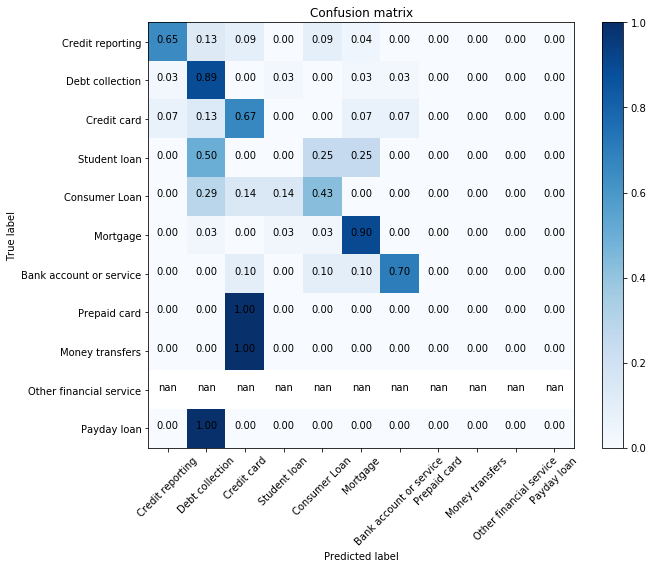

In [14]:
from _6_evaluate import evaluate
evaluate(test_texts, test_labels, 'test_model_02', train_label_values)

### Make predictions

In [15]:
from _7_make_predictions import make_predictions
make_predictions('test_model_02', test_texts[5])


The model predicts: Credit reporting


In [19]:
from _7_make_predictions import comp_pred
comp_pred('test_model_02', test_texts, test_labels, 5)

Text:
 credit karma reporting open accounts credit report closed due bankruptcythe open accounts medical xxxx credit karma wrongfully reporting equifax already fixed problem

The true label is: Credit reporting

The model predicts: Credit reporting
